## Прогнозирование надоя и вкуса молока коров для фермерского хозяйства «Вольный луг»

### Описание исследования
Фермерское хозяйство «Вольный луг» планирует расширение поголовья коров за счёт покупки новых бурёнок у ассоциации пастбищ «ЭкоФерма». Задача состоит в том, чтобы с помощью методов машинного обучения создать две модели: одна должна предсказать возможный удой коровы, другая — вероятность получения вкусного молока по критериям фермера.

### Цель исследования
Разработать модели машинного обучения, которые помогут фермеру объективно оценивать коров перед покупкой и принимать решения, минимизируя риски.

### Суть исследования
Провести анализ данных о текущих коровах фермы и данных о коровах, которые фермер планирует приобрести, чтобы:

Прогнозировать надой каждой коровы в год.
Прогнозировать вероятность, что молоко коровы будет вкусным.
Задачи исследования
Выполнить предобработку данных, устранив пропуски и дубликаты.
Провести исследовательский анализ данных, изучить взаимосвязи между признаками.
Обучить модель регрессии для прогнозирования удоя.
Обучить модель классификации для прогнозирования вкуса молока.
Сравнить результаты моделей и сделать выводы для фермера.

### Исходные данные
Исследование выполняется на трёх датасетах:

ferma_main.csv — содержит данные о текущем стаде фермера.
ferma_dad.csv — содержит данные о родителях коров.
cow_buy.csv — данные о коровах, которые фермер хочет купить.

Данное исследование разделим на несколько частей:
#### Часть 1. Изучение общей информации:
Изучение данных и получение общей информации о них.
Проверка данных на пропуски и дубликаты.
#### Часть 2. Подготовка данных:
Приведение данных к нужным типам.
Обработка аномалий и ошибок.
#### Часть 3. Исследовательский анализ данных:
Статистический анализ признаков.
Выявление взаимосвязей между признаками.
#### Часть 4. Построение и обучение моделей:
Обучение моделей линейной регрессии для прогнозирования удоя.
Обучение модели логистической регрессии для прогнозирования вкуса молока.
#### Часть 5. Итоговый анализ:
Сравнение качества моделей.
Подготовка рекомендаций фермеру.

### Заключение
По результатам исследования будут даны рекомендации по выбору коров для покупки, основываясь на прогнозах удоя и вкуса молока.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

## Загрузка данных

#### Загрузим три основных датасета

In [2]:
main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
buy

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


#### Проверим содержание данных

In [6]:
datasets = [main, dad, buy]
for i in datasets:
    print(f'{i.info()}\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

В данных отсутствуют пропуски, но нужно изменить названия признаков

In [7]:
main = main.rename(columns={'Удой, кг': 'удой', 
                            'ЭКЕ (Энергетическая кормовая единица)': 'ЭКЕ', 'Сырой протеин, г': 'Сырой протеин',
                           'СПО (Сахаро-протеиновое соотношение)': 'СПО'})

In [8]:
def rename_col(df):
        df.columns = df.columns.str.lower()
        df.columns = df.columns.str.replace(',%', '')
        df.columns = df.columns.str.replace(' ', '_')

In [9]:
rename_col(main)
rename_col(dad)
rename_col(buy)

In [10]:
print(main.columns, dad.columns, buy.columns)

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object') Index(['id', 'имя_папы'], dtype='object') Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст'],
      dtype='object')


Была просмотрена основная информация о данных и изменены названия признаков

##  Предобработка данных

#### Проверим данные на дубликаты и пропуски

In [11]:
for i in range(len(datasets)):
    print(datasets[i].duplicated().sum(), datasets[i].isna().sum().sum())

5 0
0 0
4 0


In [12]:
main = main.drop_duplicates()

In [13]:
main_num_col = ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']
main_cat_col = [i for i in main.columns if i not in main_num_col and i != 'id']
buy_num_col = ['текущая_жирность', 'текущий_уровень_белок']
buy_cat_col = [i for i in buy.columns if i not in buy_num_col and i != 'имя_папы']

In [14]:
main['тип_пастбища'] = main['тип_пастбища'].str.lower()

In [15]:
for i in main_cat_col:
    print(main[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['равнинное' 'равнинные' 'холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


In [16]:
for i in buy_cat_col:
    print(buy[i].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['более_2_лет' 'менее_2_лет']


In [17]:
main['тип_пастбища'] = main['тип_пастбища'].replace({'равнинные': 'равнинное'})
main['порода_папы_быка'] = main['порода_папы_быка'].replace({'Айдиалл': 'Айдиал'})

Пропуски отсутствтуют, дубликаты удалены

#### Проверим типы данных

In [18]:
for i in range(len(datasets)):
    print(datasets[i].dtypes, '\n')

id                                        int64
Удой, кг                                  int64
ЭКЕ (Энергетическая кормовая единица)    object
Сырой протеин, г                          int64
СПО (Сахаро-протеиновое соотношение)     object
Порода                                   object
Тип пастбища                             object
порода папы_быка                         object
Жирность,%                               object
Белок,%                                  object
Вкус молока                              object
Возраст                                  object
dtype: object 

id           int64
имя_папы    object
dtype: object 

порода                   object
тип_пастбища             object
порода_папы_быка         object
имя_папы                 object
текущая_жирность         object
текущий_уровень_белок    object
возраст                  object
dtype: object 



Некоторые признаки object можно заменить на float или Bool

In [19]:
def obj_to_float(df, lst):
    for i in lst:
        df[i] = df[i].str.replace(',', '.').astype(float)

In [20]:
def obj_to_bool(col, dic):
    return col.map(dic).astype(int)

In [21]:
obj_to_float(main, ['жирность', 'белок', 'спо', 'эке'])
obj_to_float(buy, ['текущая_жирность', 'текущий_уровень_белок'])

In [22]:
print(f'{main.dtypes}\n\n{dad.dtypes}\n\n{buy.dtypes}')

id                    int64
удой                  int64
эке                 float64
сырой_протеин         int64
спо                 float64
порода               object
тип_пастбища         object
порода_папы_быка     object
жирность            float64
белок               float64
вкус_молока          object
возраст              object
dtype: object

id           int64
имя_папы    object
dtype: object

порода                    object
тип_пастбища              object
порода_папы_быка          object
имя_папы                  object
текущая_жирность         float64
текущий_уровень_белок    float64
возраст                   object
dtype: object


## Исследовательский анализ данных

#### Проведем статистический анализ всех признаков

In [23]:
main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [24]:
buy.describe()

,текущая_жирность,текущий_уровень_белок
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


В большинстве признаков нет аномалий. Только в признаке "удой" из таблицы main заметен сильный выброс, а также достаточно большое стандартное отклонение 


#### Построим графики для всех признаков

In [25]:
def num_hist(df, lst):
    for i in lst:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
        
        df[i].plot(kind='hist', bins=15, ax=axes[0])
        axes[0].set_title(f'Гистограмма {df[i].name}')
        axes[0].set_xlabel(df[i].name)
        axes[0].set_ylabel('Частота')

        df[i].plot(kind='box', ax=axes[1])
        axes[1].set_title(f'Boxplot {df[i].name}')
        
        plt.tight_layout()
        plt.show()

In [26]:
def cat_bar(df, lst):
     for i in lst:
        plt.figure()
        df[i].value_counts().plot(kind='bar')
        plt.title(df[i].name)
        plt.xlabel(df[i].name)
        plt.ylabel('Частота')
        plt.show()

Визуализируем числовые

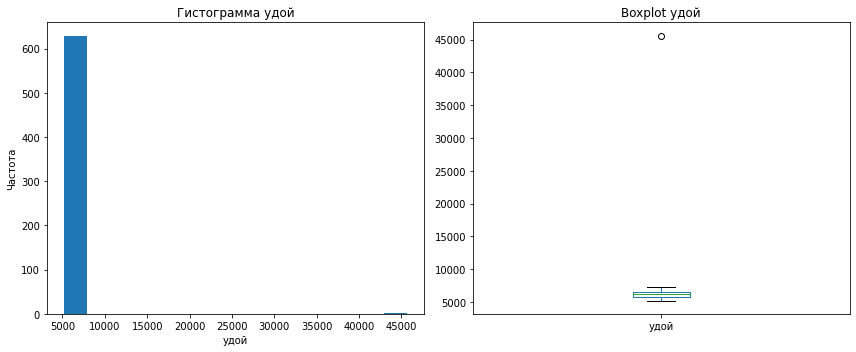

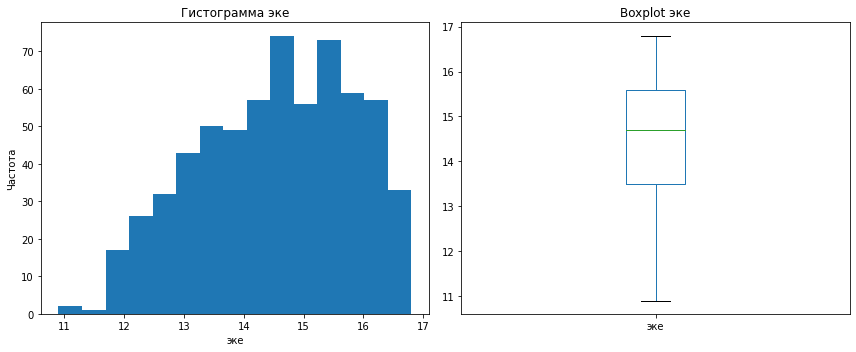

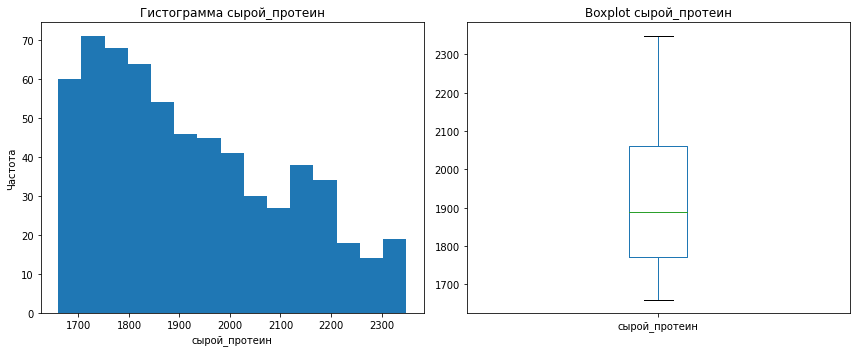

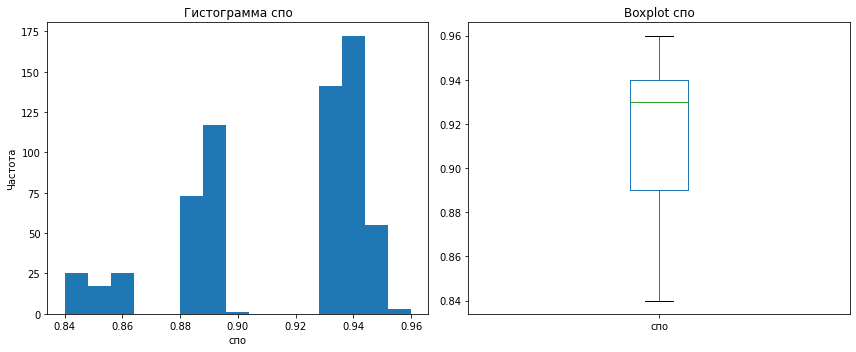

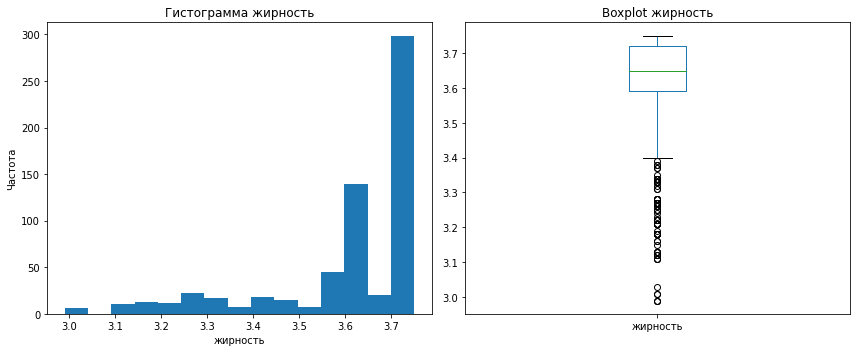

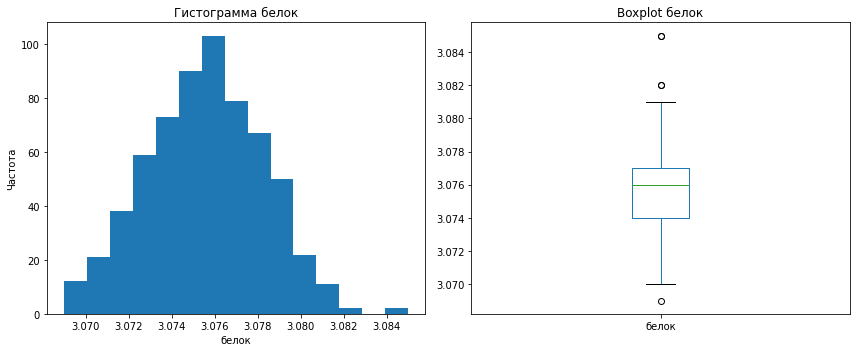

In [27]:
num_hist(main, main_num_col)

Удой имеет явный выброс, от которого следует избавиться. Во многих признаках также имеется бимодальность

In [28]:
main = main.query('удой < 20000')

Признак "жирность" имеет выраженные границы в точках 3.55 и 3.65. По этим границам можно разделить жирность на 3 категории 

In [29]:
main['жирность'] = main['жирность'].apply(lambda x: 'низкая_жирность' if x < 3.55 else\
                                          ('средняя_жирность' if x <3.65 else 'высокая_жирность'))
buy['текущая_жирность'] = buy['текущая_жирность'].apply(lambda x: 'низкая_жирность' if x < 3.55 else\
                                          ('средняя_жирность' if x <3.65 else 'высокая_жирность'))

In [30]:
main_num_col = ['удой', 'эке', 'сырой_протеин', 'спо', 'белок']
main_cat_col = [i for i in main.columns if i not in main_num_col and i != 'id']
buy_num_col = [ 'текущий_уровень_белок']
buy_cat_col = [i for i in buy.columns if i not in buy_num_col and i != 'имя_папы']

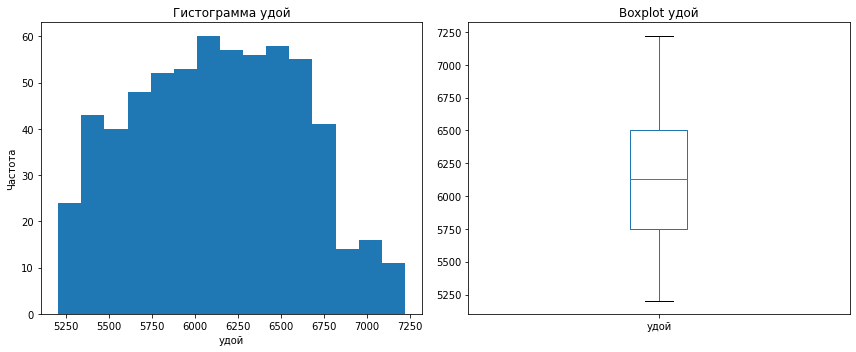

In [31]:
num_hist(main, ['удой'])

Ни один признак не имеет нормальное распределение. СПО имеет большую часть всех своих значений в трех определенных промежутках

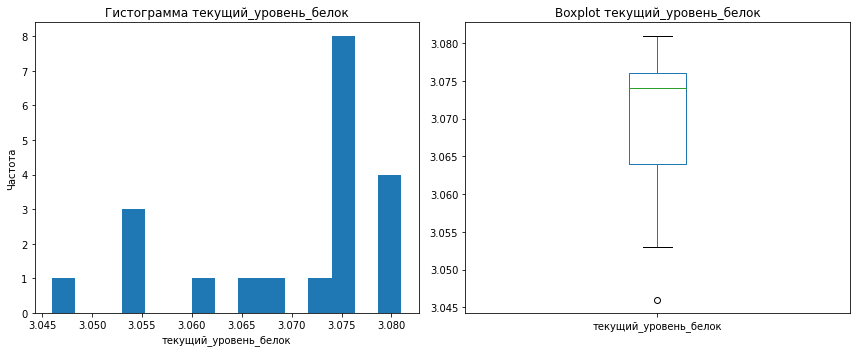

In [32]:
num_hist(buy, buy_num_col)

Так как в таблице buy всего 20 значений, нельзя однозначно сказать о выбросах и распределениях в количественных переменных

Визуализируем категориальные

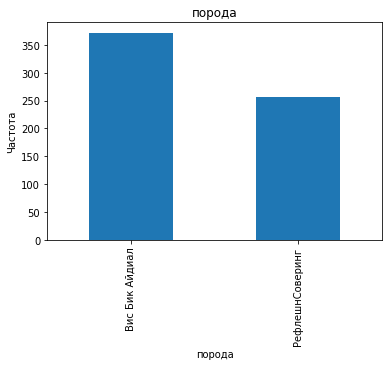

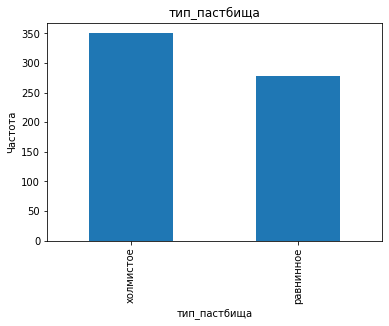

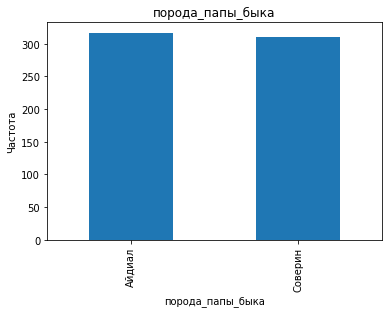

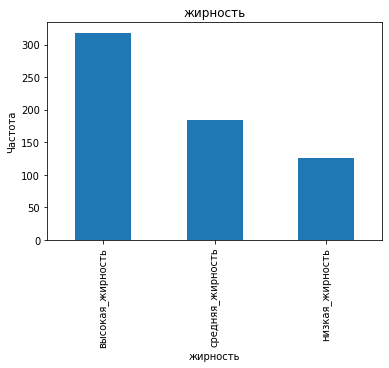

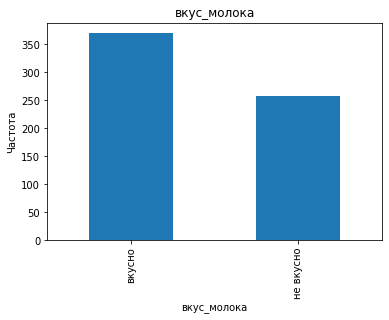

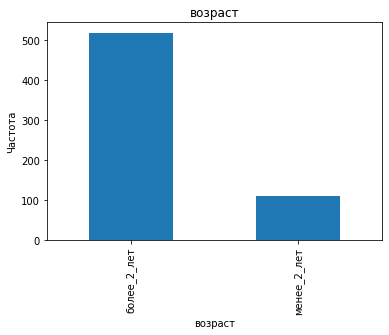

In [33]:
cat_bar(main, main_cat_col)

Большая часть признаков имеет схожую частоту встречаемости значений. Выделить можно возраст, где количество коров с возрастом более 2-х лет в 5 раз больше коров, не достигших возраста 2-х лет

В целевой переменной "вкус молока" наблюдается дисбаланс классов с перевесом в сторону "вкусно". Это может привести к тому, что модель будет лучше распознавать объекты этого класса 

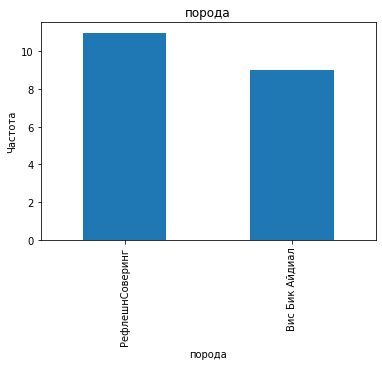

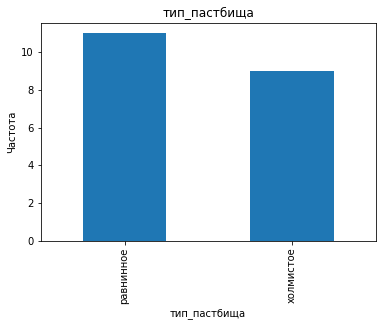

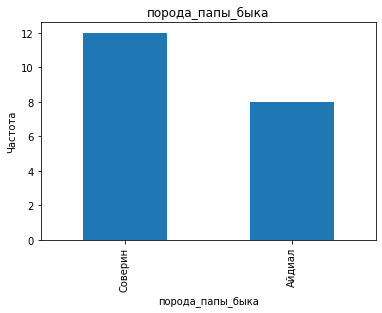

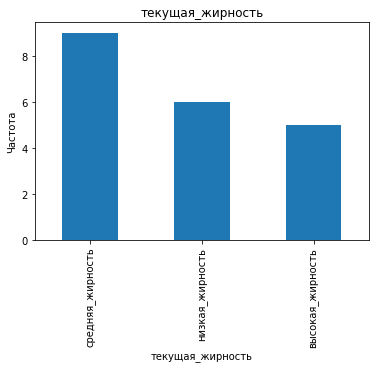

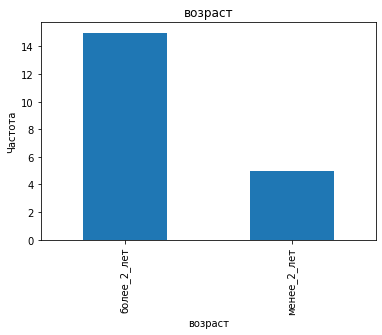

In [34]:
cat_bar(buy, buy_cat_col)

Можно заметить, как и с таблицей main, коров, достигших возраста больше 2-х лет больше, чем не достигших, а также в признаке 'порода_папы_быка' преобладает соверин

## Корреляционный анализ

#### Проверим кореляцию признаков между собой

In [35]:
cor = main.drop('id', 1).corr(method='spearman')

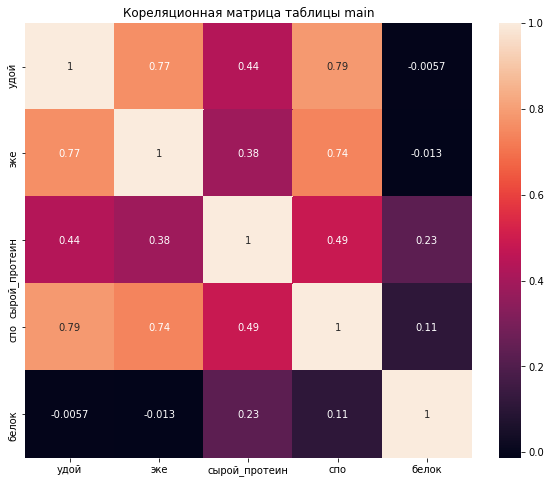

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True);
plt.title('Кореляционная матрица таблицы main')
plt.show()

Наибольшая кореляция с удоем у эке и спо, меньше - у сырого протеина. Белок не корелирует ни с одним признаком. Подозрения на мультиколлинеарность отсутствуют 

#### Проверим кореляцию признаков с целевой переменной

In [37]:
main_cat_col

['порода',
 'тип_пастбища',
 'порода_папы_быка',
 'жирность',
 'вкус_молока',
 'возраст']

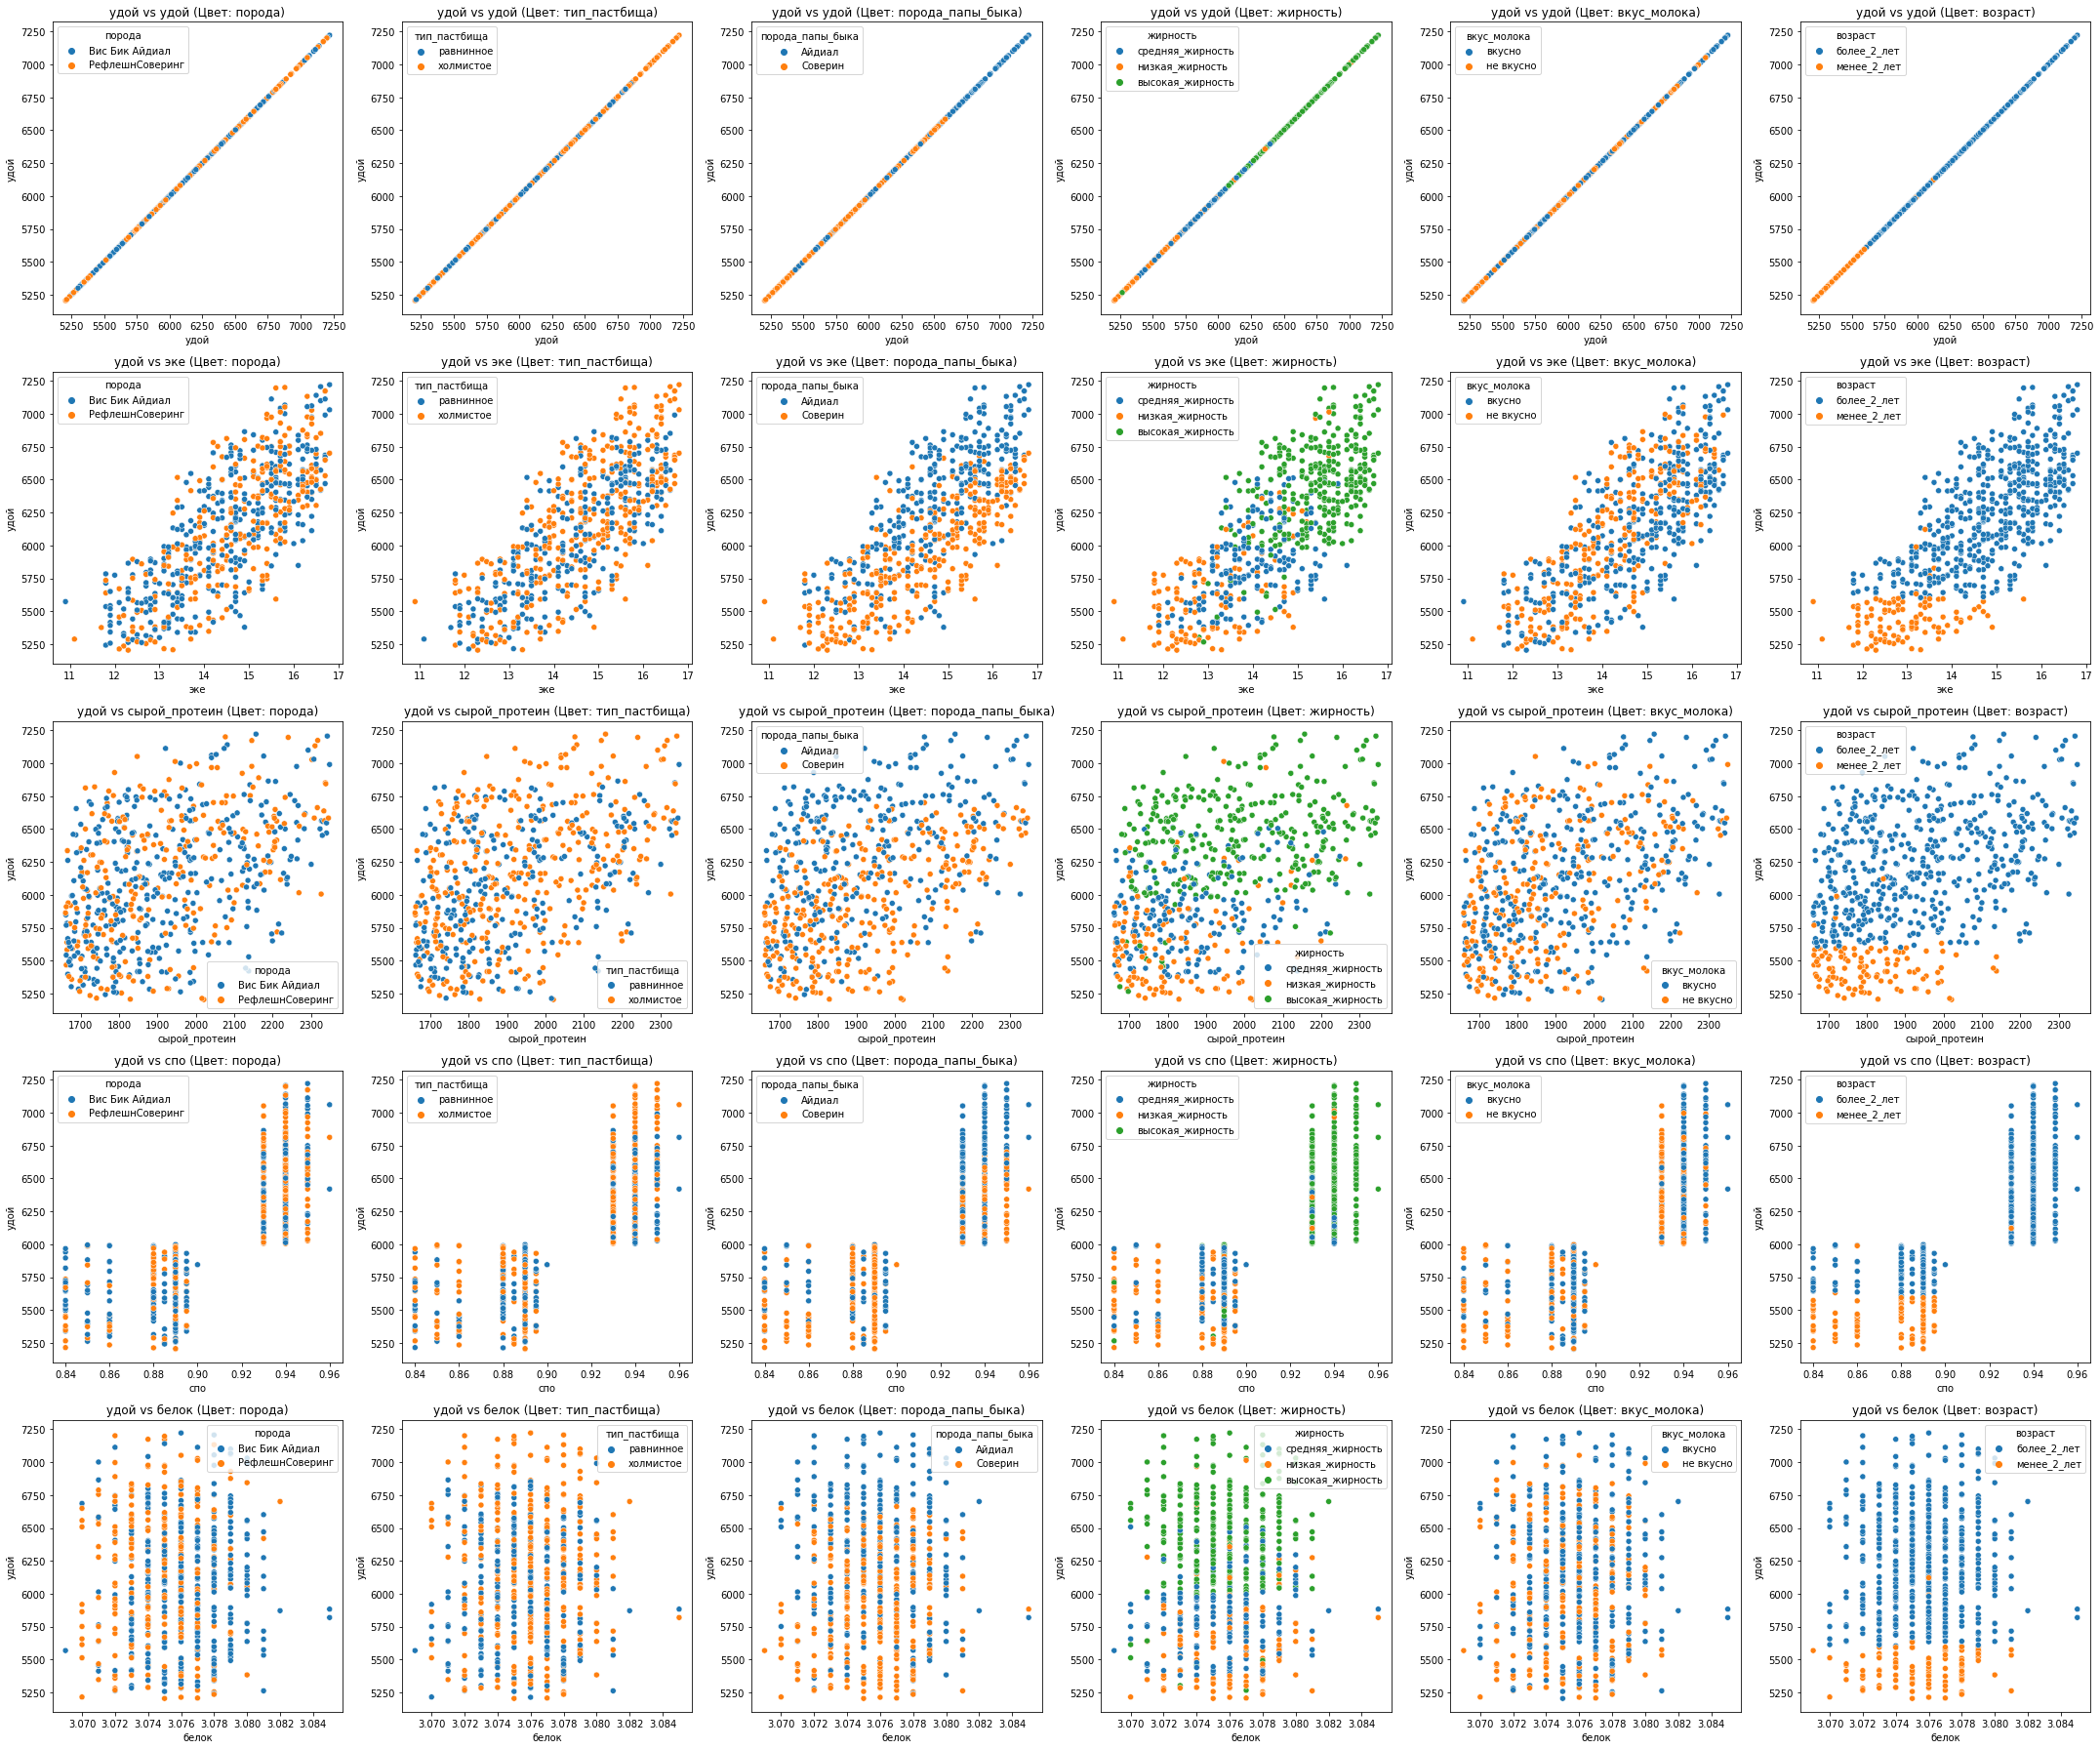

In [38]:
for feature in satisfaction.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=satisfaction, x=feature, y='')
    plt.title(f'Scatter plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


Расположение точек на графиках соотносится с коэфицентами кореляции числовых признаков.

Все числовые признаки влияют на удой больше, если корова имеет возраст больше двух лет

Категориальные значения, расположенные неравномерно:
1. Влияние ЭКЕ, СПО, жирности и белков на удой выше у коров с породой папы айдал 
2. Влияние СПО, жирности и белков на удой выше у коров с холмистого пастбища

#### Выводы по кореляции:
1. Заметно сильное влияние всех признаков, кроме белка и сырого белка на целевую переменную. Для ЭКЕ зависимость практически линейная
2. Нелинейная зависимость наблюдается для СПО, жирности и белка
3. Мультиколлинеарности между входными признаками нет

## Обучение модели линейной регрессии

Обучим модель линейной регрессии, предобработав данные и исключив белок, так как его влияние на модель незначительно.

In [39]:
X = main.drop(['id', 'удой', 'белок', 'вкус_молока', 'жирность'], axis=1)
y = main['удой']
random_state = 42

In [40]:
X_num_col = X.select_dtypes(exclude='object').columns
X_cat_col = X.select_dtypes('object').columns

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [42]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), X_num_col),
                                               ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
                                                X_cat_col)])

In [43]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [44]:
model_lr = LinearRegression()

In [45]:
model_lr.fit(X_train_transformed, y_train)

LinearRegression()

In [46]:
y_pred = model_lr.predict(X_test_transformed)

In [47]:
r2_score(y_test, y_pred)

0.7844078173416967

Модель показывает неплохое значение R2. Нужно проанализировать остатки

In [48]:
residuals = y_test - y_pred

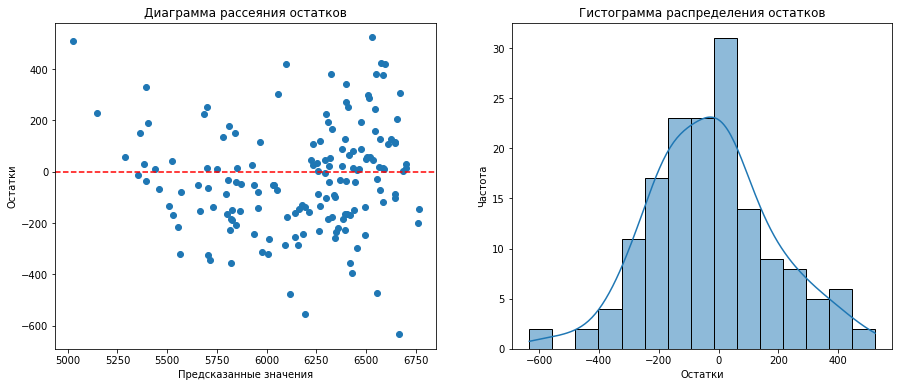

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_pred, residuals)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Диаграмма рассеяния остатков')

sns.histplot(residuals, bins=15, kde=True, ax=axes[1])
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения остатков')

plt.show()

Можно заметить, что чем больше предсказанное значение, тем больший разброс у остатков. Возможно, стоит поработать над признаками модели, чтобы улучшить её предсказания

#### Преобразуем признаки

На графике зависимости удоя и СПО, можно было заметить, что СПО разделен на 2 кластера, имеющих четкую границу. Имеет смысл обозначить эти кластеры, заменив значения СПО на 0 и 1. Также нужно ввести признак "ЭКЕ в квадрате"

In [50]:
X_new = X.copy()

In [51]:
X_new['спо'] = X['спо'].apply(lambda x: 1 if x > 0.92 else 0)
X_new['эке_кв'] = X_new['эке'] **2

In [52]:
X_new_num_col = X_new.select_dtypes(exclude='object').columns
X_new_cat_col = X_new.select_dtypes('object').columns

In [53]:
preprocessor2 = ColumnTransformer(transformers=[('num', StandardScaler(), X_new_num_col),
                                               ('cat', OneHotEncoder(drop='first',  handle_unknown='ignore'),
                                                X_new_cat_col)])

In [54]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, random_state=random_state)

In [55]:
X_train_new_transformed = preprocessor2.fit_transform(X_train_new)
X_test_new_transformed = preprocessor2.transform(X_test_new)

In [56]:
model_lr2 = LinearRegression()

In [57]:
model_lr2.fit(X_train_new_transformed, y_train)

LinearRegression()

In [58]:
y_pred_new = model_lr2.predict(X_test_new_transformed)

In [59]:
r2_score(y_test, y_pred_new)

0.8173201325732173

In [60]:
residuals_new = y_test - y_pred_new

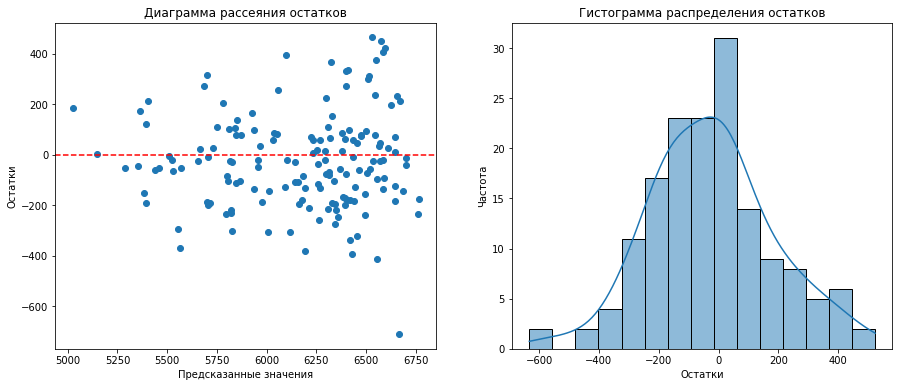

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_pred, residuals_new)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Диаграмма рассеяния остатков')

sns.histplot(residuals, bins=15, kde=True, ax=axes[1])
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения остатков')

plt.show()

R2 стала немного лучше, а остатки стали распределены более равномерно

#### Добавим признак "имя_папы"

In [62]:
main_dad = main.merge(dad, on='id')

In [63]:
X_dad = main_dad.drop(['id', 'удой', 'жирность', 'белок', 'вкус_молока'], axis=1)
y = main_dad['удой']
random_state = 42

In [64]:
X_dad['спо'] = X_dad['спо'].apply(lambda x: 1 if x > 0.92 else 0)
X_dad['эке_кв'] = X_dad['эке'] **2

In [65]:
X_dad_num_col = X_dad.select_dtypes(exclude='object').columns
X_dad_cat_col = X_dad.select_dtypes('object').columns

In [66]:
preprocessor3 = ColumnTransformer(transformers=[('num', StandardScaler(), X_dad_num_col),
                                               ('cat', OneHotEncoder(drop='first',  handle_unknown='ignore'), 
                                                X_dad_cat_col)])

In [67]:
X_train_dad, X_test_dad, y_train, y_test = train_test_split(X_dad, y, random_state=random_state)

In [68]:
X_train_dad_transformed = preprocessor3.fit_transform(X_train_dad)
X_test_dad_transformed = preprocessor3.transform(X_test_dad)

In [69]:
model_lr3 = LinearRegression()

In [70]:
model_lr3.fit(X_train_dad_transformed, y_train)

LinearRegression()

In [71]:
y_pred_dad = model_lr3.predict(X_test_dad_transformed)

In [72]:
r2_score(y_test, y_pred_dad)

0.8288305584835521

In [73]:
residuals_dad = y_test - y_pred_dad

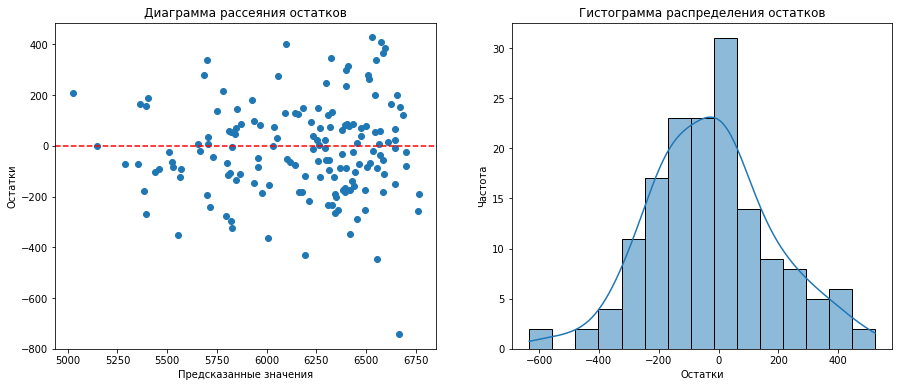

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].scatter(y_pred, residuals_dad)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Предсказанные значения')
axes[0].set_ylabel('Остатки')
axes[0].set_title('Диаграмма рассеяния остатков')

sns.histplot(residuals, bins=15, kde=True, ax=axes[1])
axes[1].set_xlabel('Остатки')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения остатков')

plt.show()

Значение R2 стало еще выше, остатки такие же, как и во второй модели

Оценим значения MSE, RMSE и MAE для трех моделей

In [75]:
mse = []
rmse = []
mae = []
for i in [y_pred, y_pred_new, y_pred_dad]:
    mse.append(mean_squared_error(y_test, i))
    rmse.append(mean_squared_error(y_test, i)**0.5)
    mae.append(mean_absolute_error(y_test, i))

pd.DataFrame({'model': [1, 2, 3], 'mse': mse, 'rmse': rmse, 'mae': mae})

,model,mse,rmse,mae
0,1,43887.015010,209.492279,164.241945
1,2,37187.220728,192.839884,150.771505
2,3,34844.101286,186.665747,145.506027


По всем трем метрикам лучшей себя показала третья модель

Рассчитаем доверительный интервал

In [76]:
lower = np.quantile(y_pred_dad, 0.025)
upper = np.quantile(y_pred_dad, 0.975)
print(f'доверительный интервал - от {lower} до {upper}')

доверительный интервал - от 5378.889790366385 до 6779.537358495814


#### Добавим новые признаки в buy и предскажем удой

In [77]:
for i in ['эке', 'сырой_протеин', 'спо']:
     buy[i] = main[i].mean() * 1.05


In [78]:
buy = buy.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'})

In [79]:
X_buy = buy.drop(['белок', 'жирность'], axis=1)

In [80]:
X_buy['спо'] = X_buy['спо'].apply(lambda x: 1 if x > 0.92 else 0)
X_buy['эке_кв'] = X_buy['эке'] **2

In [81]:
X_buy = X_buy[X_dad.columns]

In [82]:
X_buy_num_col = X_buy.select_dtypes(exclude='object').columns
X_buy_cat_col = X_buy.select_dtypes('object').columns

In [83]:
X_buy_transformed = preprocessor3.transform(X_buy)

In [84]:
predictions = model_lr3.predict(X_buy_transformed)

In [85]:
predictions

array([6581.06917531, 6308.70183835, 6263.0249061 , 6571.7631311 ,
       6525.08219609, 6341.47036315, 6581.06917531, 6541.43414119,
       6263.0249061 , 6339.03082827, 6324.46512711, 6574.20266598,
       6581.06917531, 6065.24229799, 6263.0249061 , 6571.7631311 ,
       6324.46512711, 6341.47036315, 6541.43414119, 6525.08219609])

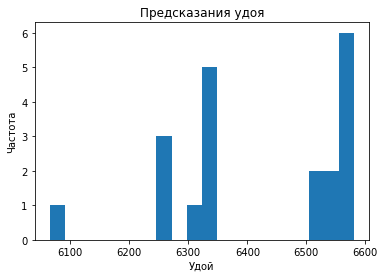

In [86]:
plt.hist(predictions, bins=20)
plt.title('Предсказания удоя')
plt.xlabel('Удой')
plt.ylabel('Частота')
plt.show()

Модель предсказала, что ни одна корова не принесет удой менее 6000 кг.

## Обучение модели логистической регрессии

#### Обучим модель и предскажем вкус молока

In [87]:
X = main_dad.drop(['id', 'удой', 'вкус_молока'], axis=1)
y = main_dad['вкус_молока']

In [88]:
X['спо'] = X['спо'].apply(lambda x: 1 if x > 0.92 else 0)
X['эке_кв'] = X['эке'] **2

In [89]:
X_num_col = X.select_dtypes(exclude='object').columns
X_cat_col = X.select_dtypes('object').columns

In [90]:
preprocessor5 = ColumnTransformer(transformers=[('num', StandardScaler(), X_num_col),
                                               ('cat', OneHotEncoder(drop='first',  handle_unknown='ignore'), 
                                                X_cat_col)])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [92]:
X_train_transformed = preprocessor5.fit_transform(X_train)
X_test_transformed = preprocessor5.transform(X_test)

In [93]:
model_logreg = LogisticRegression()

In [94]:
model_logreg.fit(X_train_transformed, y_train)

LogisticRegression()

In [95]:
y_pred = model_logreg.predict(X_test_transformed)

Посмотрим на метрики

In [96]:
labels = ['вкусно', 'не вкусно']

In [97]:
print(f'accuracy - {accuracy_score(y_test, y_pred)}\n'
      f'precision - {precision_score(y_test, y_pred, labels=labels, average="binary", pos_label="вкусно")}\n'
      f'recall - {recall_score(y_test, y_pred, labels=labels, average="binary", pos_label="вкусно")}')


accuracy - 0.6305732484076433
precision - 0.625
recall - 0.8522727272727273


In [98]:
len([i for i in y_pred if i == 'вкусно'])

120

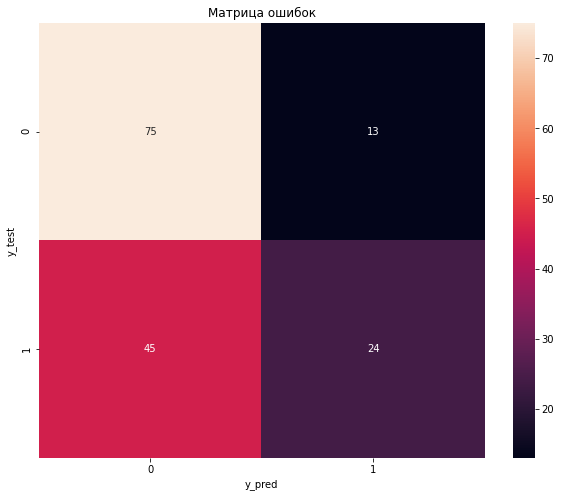

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=labels), annot=True)
plt.title('Матрица ошибок')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [100]:
model_logreg.predict_proba(X_test_transformed)
model_logreg.classes_

array(['вкусно', 'не вкусно'], dtype=object)

Низкое значение precision указывает на то, что слишком много объектов были ложно отнесены к классу вкусно, это также подтверждается матрицей. Хоть и значение recall весьма неплохое, но метрика precision в данной задаче куда важнее, поэтому попробуем ее повысить, изменив порог

In [101]:
prob = pd.Series(model_logreg.predict_proba(X_test_transformed)[:, 1])
thresholds = np.linspace(0.125, 0.2, 10)
precision = []
threshold = []
vskusno = []
for i in thresholds:
    y_th = prob.apply(lambda x: model_logreg.classes_[1] if x > i else model_logreg.classes_[0])
    precision.append(precision_score(y_test, y_th, pos_label="вкусно"))
    threshold.append(i)
pd.DataFrame({'precision': precision, 'threshold': threshold})

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,threshold
0,0.000000,0.125000
1,1.000000,0.133333
2,1.000000,0.141667
3,1.000000,0.150000
4,1.000000,0.158333
5,1.000000,0.166667
6,1.000000,0.175000
7,1.000000,0.183333
8,0.888889,0.191667
9,0.818182,0.200000


Можно заметить, что precision равен 1 при пороге 0.183. Это минимизирует критическую ошибку
Рассчитаем метрики с этим порогом

In [102]:
y_pred_th = prob.apply(lambda x: model_logreg.classes_[1] if x > 0.183 else model_logreg.classes_[0])
print(f'accuracy - {accuracy_score(y_test, y_pred_th)}\n'
      f'precision - {precision_score(y_test, y_pred_th, labels=labels, average="binary", pos_label="вкусно")}\n'
      f'recall - {recall_score(y_test, y_pred_th, labels=labels, average="binary", pos_label="вкусно")}')


accuracy - 0.4840764331210191
precision - 1.0
recall - 0.07954545454545454


accuracy и recall стали ниже, но даже так модель будет работать лучше для данного случая

#### Предскажем вкус молока для buy

In [103]:
X = buy.copy()

In [104]:
X['спо'] = X['спо'].apply(lambda x: 1 if x > 0.92 else 0)
X['эке_кв'] = X['эке'] **2

In [105]:
X = X[X_train.columns]

In [106]:
X_buy_transformed = preprocessor5.transform(X)

In [107]:
def apply_threshold(model, data, threshold):
    return pd.Series(model.predict_proba(data)[:, 1])\
    .apply(lambda x: model.classes_[1] if x > threshold else model.classes_[0])

In [108]:
y_pred_th = apply_threshold(model_logreg, X_buy_transformed, 0.183)

In [109]:
pd.Series(y_pred_th).value_counts()

не вкусно    20
dtype: int64

Если мы хотим свести риск купить корову, которая будет давать невкусное молоко к нулю, то ни одна корова из возможных не подходит для покупки

## Итоговые выводы

Выведем коров, которые подходят под критерии фермера

In [110]:
buy_result = buy.copy()
buy_result['удой'] = predictions
buy_result['вкус_молока'] = y_pred_th

In [111]:
buy_result.query('удой > 6000 and вкус_молока == "вкусно"')

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,удой,вкус_молока


К сожалению, ни одна корова не подходит для покупки. 
Возможные варианты решения проблемы::
1. Принять риск и все же купить коров, чье молоко наиболее вероятно будет вкусным, однако гарантий верного выбора нет
2. Найти новый набор коров, которых можно было бы приобрести

#### Выводы о линейной и логистической регрессии

1. Для улучшения качества регррессионной модели использовались кореляционный анализ, устранение нелинейности и изменение признаков. 
2. Улучшить результаты регрессионной модели еще можно устранив мультиколлинеарность между признаками и максимально увеличив линейную зависимость между целевым признаком и входными
3. Выбор метрик зависит от задачи. Accuracy будет полезной метрикой, когда важно то, верно ли модель определяет классы, без привязки к тому, что верное предсказание одного класса гораздо важнее, чем верное предсказание другого. Precision лучше использовать, когда мы хотим минимизировать присвоение положительного класса объекту отрицательного. Recall же подходит когда мы стремимся максимально верно определить все объекты положительного класса, не обращая внимания на отрицательный